# Evaluate the training result 
Training analysis is a a tool to evaluate the training result of lenet5 neural network. It could display the accuracy on training set and test set in graph. Or you can check the test datato show the image which is wrongly predicted in each batch of test data evaluation. 

## Define the variables to track
There are 5 variables to monitor during the training.
- Training accuracy
- Test accuracy
- Test images
- Test labels
- Prediction in test

In [1]:
import os 
import sys
sys.path.append('../common/')
sys.path.append('../cifar10/')

import matplotlib.pyplot as plt
from cifar10 import cifar10
from train_log import train_log
import numpy as np

## Display training accuracy vs. test accuracy

In [7]:
def show_chart(data, rows = 1, column = 1, figsize=(6, 12), dpi=100):
    plt.rcParams['figure.dpi'] = dpi 
    fig, ax = plt.subplots(nrows=rows, ncols=column)
    legend = []
    labels = []
    i = 0
    for listitem in data:
        j = 0
        for item in listitem:
            step = []
            step_accuracy = []
            for d in item[1]:
                step.append(d[0])
                step_accuracy.append(d[1])
            if rows * column == 1:
                ax.plot(step, step_accuracy,label=item[0])
            else:
                ax[i].plot(step, step_accuracy,label=item[0])
            j += 1
        i += 1
    plt.legend(loc='best')
    plt.show()
    

In [8]:
def get_average(data, step):
    '''
    data is a list of items
    item[0] index
    item[1] value
    '''
    i = 0
    sum_val = 0
    for i in range(len(data)):
        sum_val += data[i][1]
        if i > step:
            sum_val -= data[i-step][1]        
        data[i][1] = sum_val/min(i+1,step)
        i += 1
    return data

## Show the train loss

## Show the Train accuracy vs. Test accuracy

file open success
file open success
file open success
file open success
file open success


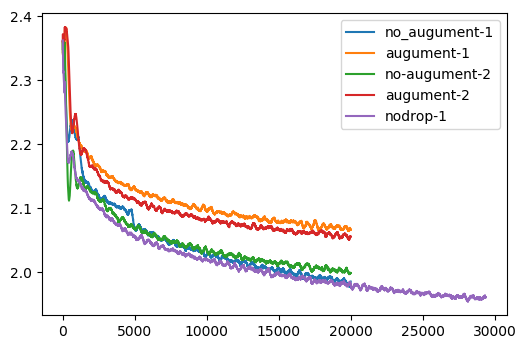

In [29]:
from train_log import train_log
log_dir_list = [#['wrap-1','../Le-Net5/image_augument_study/log_1/'],
                #['wrap-2','../Le-Net5/image_augument_study/log_4/'],
                #['flip-1','../Le-Net5/image_augument_study/log_2/'],
                #['flip-2','../Le-Net5/image_augument_study/log_5/'],
                #['distort-1','../Le-Net5/image_augument_study/log_3/'],
                #['distort-2','../Le-Net5/image_augument_study/log_6/'],
                ['no_augument-1','../Le-Net5/image_augument_study/log_7/'],
                ['augument-1', '../Le-Net5/image_augument_study/log_8/'],
                ['no-augument-2', '../Le-Net5/image_augument_study/log_9/'],
                ['augument-2', '../Le-Net5/image_augument_study/log_10/'],
                ['nodrop-1','../Le-Net5/image_augument_study/log_101/']
                #['nodrop-2','../Le-Net5/image_augument_study/log_102/']
               ]

log = {}
log_data = []

for log_dir in log_dir_list: 
    log = train_log(log_dir[1]) 
    data = log.readlog('train_loss',maxrecord=1000000)
    data = get_average(data, 125)
    log_data.append([log_dir[0],data])
show_chart([log_data],1,1,dpi=100)

file open success
file open success


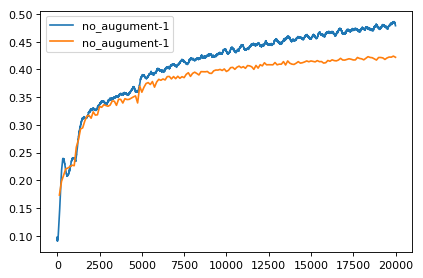

file open success
file open success


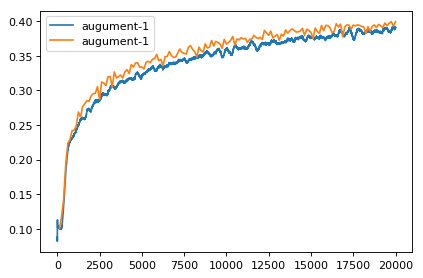

file open success
file open success


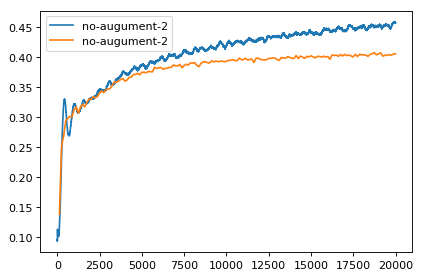

file open success
file open success


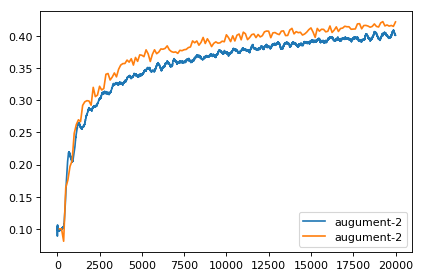

file open success
file open success


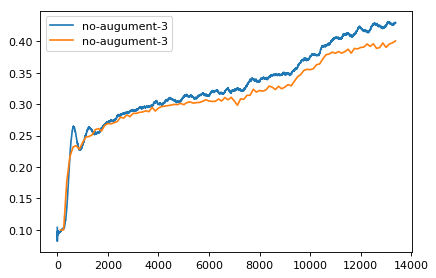

file open success
file open success


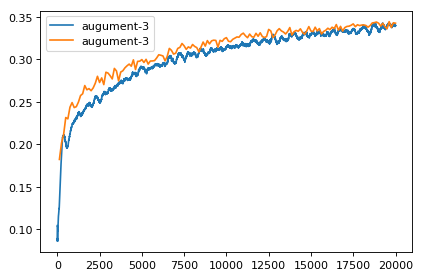

file open success
file open success


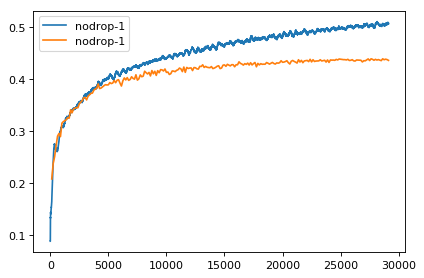

In [25]:
log_data = []

from train_log import train_log
log_dir_list = [#['wrap-1','../Le-Net5/image_augument_study/log_1/'],
                #['wrap-2','../Le-Net5/image_augument_study/log_4/'],
                #['flip-1','../Le-Net5/image_augument_study/log_2/'],
                #['flip-2','../Le-Net5/image_augument_study/log_5/'],
                #['distort-1','../Le-Net5/image_augument_study/log_3/'],
                #['distort-2','../Le-Net5/image_augument_study/log_6/'],
                ['no_augument-1','../Le-Net5/image_augument_study/log_7/'],
                ['augument-1', '../Le-Net5/image_augument_study/log_8/'],
                ['no-augument-2', '../Le-Net5/image_augument_study/log_9/'],
                ['augument-2', '../Le-Net5/image_augument_study/log_10/'],
                ['no-augument-3', '../Le-Net5/image_augument_study/log_11/'],
                ['augument-3', '../Le-Net5/image_augument_study/log_12/'],
                ['nodrop-1','../Le-Net5/image_augument_study/log_101/'],
                #['nodrop-2','../Le-Net5/image_augument_study/log_102/']
               ]

log = {}

for log_dir in log_dir_list: 
    log_data = []
    log = train_log(log_dir[1]) 
    data = log.readlog('train_accuracy',maxrecord=1000000)
    data = get_average(data, 125)
    log_data.append([log_dir[0],data])
    log_data.append([log_dir[0],log.readlog('test_accuracy',maxrecord=1000000)])
    show_chart([log_data],1,1, dpi=80)

file open success
file open success
file open success
file open success
file open success
file open success
file open success


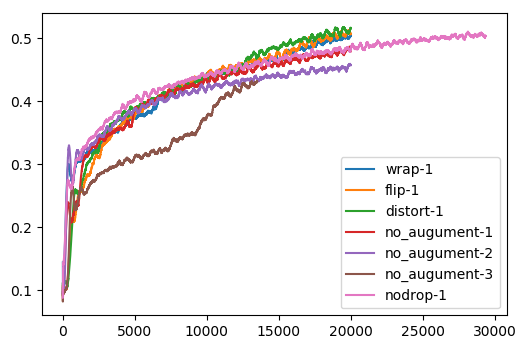

In [31]:
from train_log import train_log
log_dir_list = [['wrap-1','../Le-Net5/image_augument_study/log_1/'],
                #['wrap-2','../Le-Net5/image_augument_study/log_4/'],
                ['flip-1','../Le-Net5/image_augument_study/log_2/'],
                #['flip-2','../Le-Net5/image_augument_study/log_5/'],
                ['distort-1','../Le-Net5/image_augument_study/log_3/'],
                #['distort-2','../Le-Net5/image_augument_study/log_6/'],
                ['no_augument-1','../Le-Net5/image_augument_study/log_7/'],
                #['augument-1', '../Le-Net5/image_augument_study/log_8/'],
                ['no_augument-2', '../Le-Net5/image_augument_study/log_9/'],
                #['augument-2', '../Le-Net5/image_augument_study/log_10/'],
                ['no_augument-3', '../Le-Net5/image_augument_study/log_11/'],
                #['augument-3', '../Le-Net5/image_augument_study/log_12/'],
                ['nodrop-1','../Le-Net5/image_augument_study/log_101/'],
                #['nodrop-2','../Le-Net5/image_augument_study/log_102/']
               ]

log = {}
log_data = []

for log_dir in log_dir_list: 
    log = train_log(log_dir[1]) 
    data = log.readlog('train_accuracy',maxrecord=50000)
    data = get_average(data, 125)
    log_data.append([log_dir[0],data])
show_chart([log_data],dpi=100)

file open success
file open success
file open success
file open success
file open success
file open success
file open success


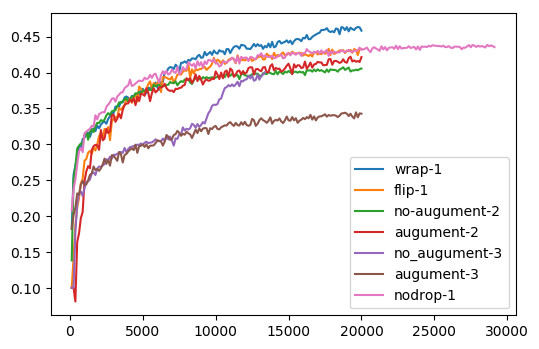

In [23]:
from train_log import train_log
log_dir_list = [['wrap-1','../Le-Net5/image_augument_study/log_1/'],
                #['wrap-2','../Le-Net5/image_augument_study/log_4/'],
                ['flip-1','../Le-Net5/image_augument_study/log_2/'],
                #['flip-2','../Le-Net5/image_augument_study/log_5/'],
                #['distort-1','../Le-Net5/image_augument_study/log_3/'],
                #['distort-2','../Le-Net5/image_augument_study/log_6/'],
                #['no_augument-1','../Le-Net5/image_augument_study/log_7/'],
                #['augument-1', '../Le-Net5/image_augument_study/log_8/'],
                ['no-augument-2', '../Le-Net5/image_augument_study/log_9/'],
                ['augument-2', '../Le-Net5/image_augument_study/log_10/'],
                ['no_augument-3', '../Le-Net5/image_augument_study/log_11/'],
                ['augument-3', '../Le-Net5/image_augument_study/log_12/'],
                ['nodrop-1','../Le-Net5/image_augument_study/log_101/'],
                #['nodrop-2','../Le-Net5/image_augument_study/log_102/']
               ]

log = {}
log_data = []

for log_dir in log_dir_list: 
    log = train_log(log_dir[1]) 
    data = log.readlog('test_accuracy',maxrecord=1000000)
    log_data.append([log_dir[0],data])

show_chart([log_data])

## Reader Image Data

In [ ]:
import sys
sys.path.append('../cifar10/')
from cifar10 import cifar10
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 32
data_path = '../cifar10/cifar-10-batches-py/'
data = cifar10(size=224,path=data_path,ramdom_wrap=True,random_flip=False,random_distort=False);
batch_size=10
    
images, labels,_ = data.get_train_batch(25)
test_image, test_label, _ =data.get_test_batch(25)
print(images.shape)
print(test_image.shape)
print("Show 25 train image")

fig, axes1 = plt.subplots(5,5,figsize=(20,20))

for j in range(5):
    for k in range(5):
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(images[j*5+k])
plt.show()

print("Show 25 test image")   

fig, axes2 = plt.subplots(5,5,figsize=(20,20))
for j in range(5):
    for k in range(5):
        axes2[j][k].set_axis_off()
        axes2[j][k].imshow(test_image[j*5+k])
plt.show()

In [1]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" 
sys.path.append('../common/')
sys.path.append('../cifar10/')

import tensorflow as tf
from cifar10 import cifar10
from lenet5 import LeNet5
import matplotlib.pyplot as plt
import numpy as np


data_path = '../cifar10/cifar-10-batches-py/'
if not os.path.exists(data_path):
    print('The data path doesn\'t exist. Please check if it is a correct data path.')

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None,32,32,3], name='x_input')
    drop_rate = tf.placeholder(tf.float32, name='drop_rate')
    y_ = tf.placeholder(tf.int64, [None], name='labels')

with tf.name_scope('prediction'):
    le_net5 = LeNet5(x, drop_rate)
    y = le_net5.prediction
    prediction =tf.argmax(y,1)
    
saver = tf.train.Saver(max_to_keep=1)


train set length: 50000
test set length: 10000
norm_0:  (?, 32, 32, 3)
conv_1:  (?, 28, 28, 6)
pool_1:  (?, 14, 14, 6)
conv_2:  (?, 10, 10, 16)
pool_2:  (?, 5, 5, 16)
conv_3: (?, 1, 1, 120)
flat_1: (?, 120)
fc_2  (?, 84)
fc_3:  (?, 10)
drop_out:  (?, 10)
prediction:  (?, 10)


train set length: 50000
test set length: 10000
INFO:tensorflow:Restoring parameters from ./image_augument_study/ckpt_101/cifar10_47625.ckpt-47625


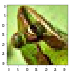

predicton: deer


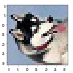

predicton: horse


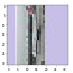

predicton: ship


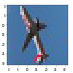

predicton: ship


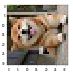

predicton: dog


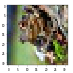

predicton: frog


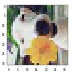

predicton: truck


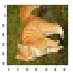

predicton: frog


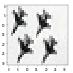

predicton: cat


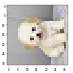

predicton: dog


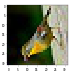

predicton: horse


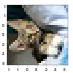

predicton: dog


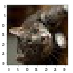

predicton: frog


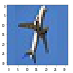

predicton: ship


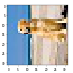

predicton: cat


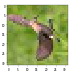

predicton: deer


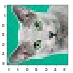

predicton: dog


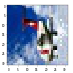

predicton: horse


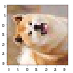

predicton: cat


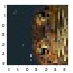

predicton: truck


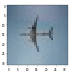

predicton: ship


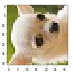

predicton: dog


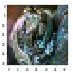

predicton: car


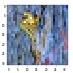

predicton: ship


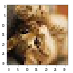

predicton: cat


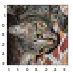

predicton: frog


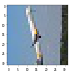

predicton: ship


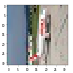

predicton: deer


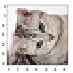

predicton: cat


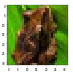

predicton: car


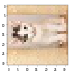

predicton: cat


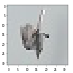

predicton: ship


In [34]:
from PIL import Image

data = cifar10(path=data_path)

plt.rcParams['figure.dpi'] = 20
ckpt_dir = './image_augument_study/ckpt_101/'
image_path = '../32x32/'

test_image=[]
for item in os.walk(image_path):     
    for file in item[2]:
        file = item[0]+'/'+file
        im = Image.open(file)
        im = np.array(im)
        im = np.transpose(im,[1,0,2])
        test_image.append(im)

with tf.Session() as sess:
    model_file=tf.train.latest_checkpoint(ckpt_dir)
    saver.restore(sess,model_file)
    #test_image, test_label,test_index = data.get_train_batch(100)
    output = sess.run([prediction],feed_dict={drop_rate: 0, x:test_image})    
    for i in range(len(test_image)):
        plt.imshow(test_image[i])
        plt.show()
        #print('label:' + data.label_dic[test_label[i]])
        print('predicton: ' + data.label_dic[output[0][i]])